# Explore Weather Trends

In [ ]:
# Extraction of data from the given database

i have queried for fetching the data.The Queries are:
    1)select * from global_data
    2)select * from city_list
    
and i have used excel for visualization too.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading csv files into dataframe

### Loading global csv file
### Loading Agra_city file
my_global=pd.read_csv(r'C:\Users\Rohan\Desktop\nano_data_science\global_data.csv')
my_city=pd.read_csv(r'C:\Users\Rohan\Desktop\nano_data_science\my_city.csv',names=['year','city','country','avg_temp'])

In [ ]:
# just seeing the no. of rows and columns
my_city.shape

In [277]:
#seeing the sample dat from city
my_city.head()

,year,city,country,avg_temp
0,1796,Agra,India,25.05
1,1797,Agra,India,26.71
2,1798,Agra,India,24.19
3,1799,Agra,India,25.31
4,1800,Agra,India,25.25


In [278]:
#checking whether any  data is missing in the table
my_city.isna().sum()

year         0
city         0
country      0
avg_temp    12
dtype: int64

In [279]:
#filling the missing values with the mean of its column value
my_city['avg_temp']=my_city.avg_temp.fillna(my_city.avg_temp.mean())

In [280]:
my_city.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

In [281]:
#checking the data types of columns
my_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   city      218 non-null    object 
 2   country   218 non-null    object 
 3   avg_temp  218 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB


In [282]:
#finding the no. of rows and columns 
my_global.shape

(266, 2)

In [283]:
#just seeing over sample data
my_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [284]:
#checking whether any null valus are present
my_global.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [285]:
my_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [286]:
#storing the temperature and year columns values in new variables for plotting
year_global=my_global['year']
temp_global=my_global['avg_temp']

year_my_city=my_city['year']
temp_my_city=my_city['avg_temp']

Text(0, 0.5, 'Average temperature in °C')

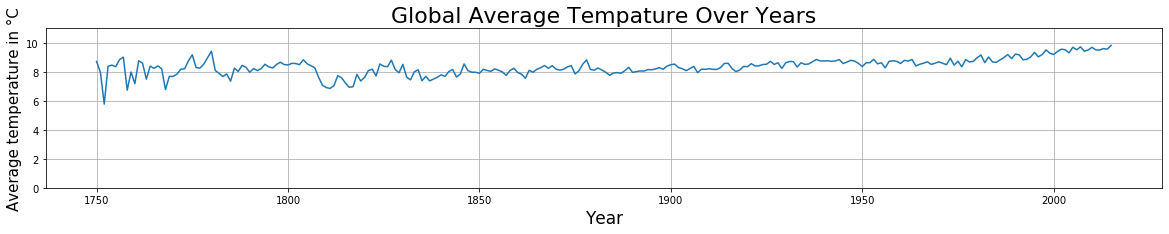

In [298]:
#Plotting the line graph of global temperature over years

#creating a figure
fig = plt.figure(figsize=(20,17)) 

#drawing no. of rows and columns
plt.subplot(5, 1, 1)

#plotting a line graph with the help of year_global,temp_global
plt.plot(year_global,temp_global)

#To show the grid lines
plt.grid(True)

#Defining a Y-axis scaling
plt.ylim((0,11))

#Labelling the title
plt.title('Global Average Tempature Over Years',fontsize=22)

#Labelling the X-axis
plt.xlabel('Year',fontsize=17)

#Labelling the Y-axis
plt.ylabel('Average temperature in °C',fontsize=15)

Text(0, 0.5, 'Average temperature in °C')

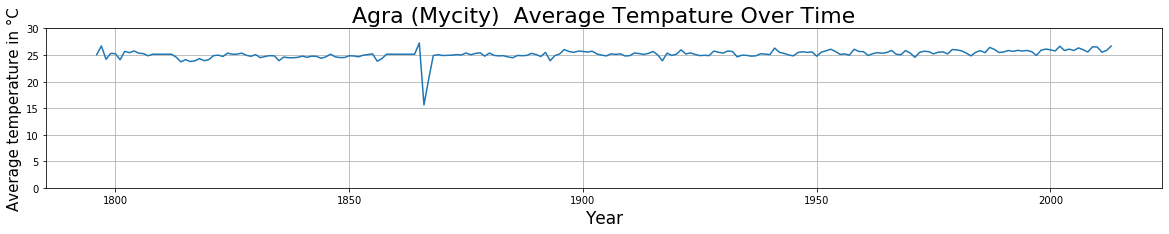

In [299]:
##Plotting the line graph of Agra(my_city) temperature over years

fig = plt.figure(figsize=(20,17))
plt.subplot(5, 1, 1)
plt.plot(year_my_city,temp_my_city)
plt.grid(True)
plt.ylim((0,30))
plt.title('Agra (Mycity)  Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)

Text(0, 0.5, 'Average temperature in °C')

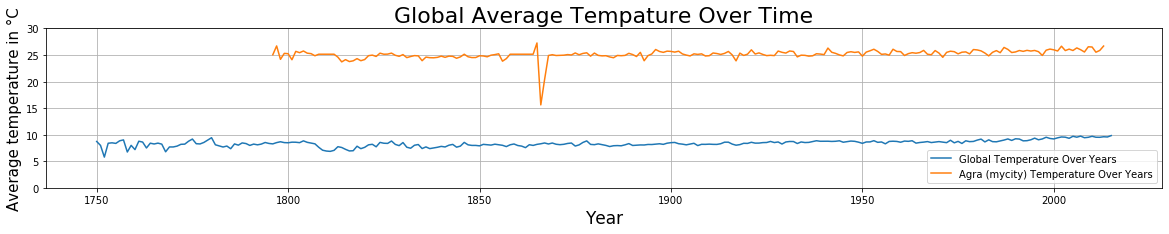

In [300]:
##Plotting the line graph of global and Agra(my_city) temperature over years

fig = plt.figure(figsize=(20,17))
plt.subplot(5,1,1)
plt.grid(True)
plt.plot(year_global,temp_global,label='Global Temperature Over Years')
plt.plot(year_my_city,temp_my_city,label='Agra (mycity) Temperature Over Years')
plt.legend(loc=4)
plt.ylim(0,30)
plt.title('Global Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)

# Key consideration for visualization

For the observations of the data to find the similarities and difference between the global data and Agra(my_city) data,we need 
the smoothness of the line graph which shows the distinct similarities and distinct differencce.I have used three levels or step
of smoothing for the curves or say trends in the graph.I have used smoothing in below given levels:
    1)1 year
    2)3 years
    3)7 years
    4)10 years
    
so,we could notice the difference and similarities.The global temperature doesn't varies much but
Agra(city) shows the frequenct changes in the temperature over years.In my opinion 1 year smoothing level is clear as it has 
visible spikes. Agra(city) temperature frequently changes over years and it continues increasing in the temperature.Global temperature doesn't changes frequently but its temperature is gradually increasing over the years. 

Text(0, 0.5, 'Average temperature in °C')

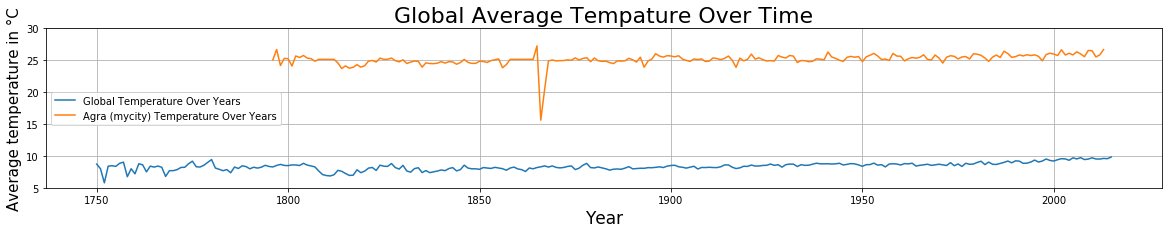

In [290]:
#plotting a graph of global and city temperature(smoothing=1 year)

#creating a figure
fig = plt.figure(figsize=(20,17))

#setting the window value
window_value=1

#calculating the moving average of global and city
global_mov_avg = pd.DataFrame(temp_global.rolling(window = window_value).mean())
local_mov_avg = pd.DataFrame(temp_my_city.rolling(window = window_value).mean())

plt.subplot(5,1,1)
plt.grid()
plt.plot(year_global,global_mov_avg,label='Global Temperature Over Years')
plt.plot(year_my_city,local_mov_avg,label='Agra (mycity) Temperature Over Years')
plt.legend(loc=6)
plt.ylim(5,30)
plt.title('Global Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)


Text(0, 0.5, 'Average temperature in °C')

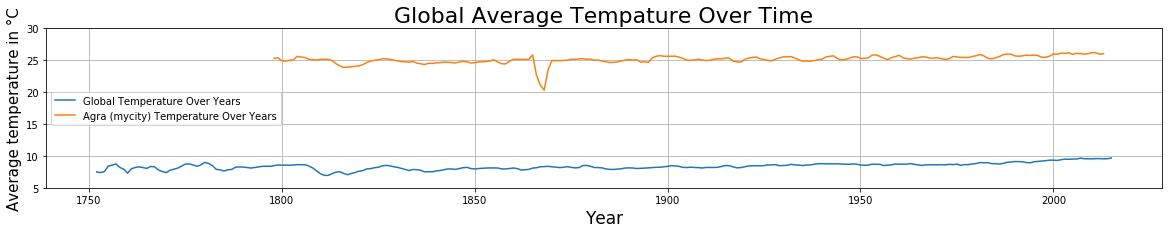

In [291]:
#plotting a graph of global and city temperature(smoothing=3 years)

fig = plt.figure(figsize=(20,17))

window_value=3

global_mov_avg = pd.DataFrame(temp_global.rolling(window = window_value).mean())
local_mov_avg = pd.DataFrame(temp_my_city.rolling(window = window_value).mean())

plt.subplot(5,1,1)
plt.grid()
plt.plot(year_global,global_mov_avg,label='Global Temperature Over Years')
plt.plot(year_my_city,local_mov_avg,label='Agra (mycity) Temperature Over Years')
plt.legend(loc=6)
plt.ylim(5,30)
plt.title('Global Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)


Text(0, 0.5, 'Average temperature in °C')

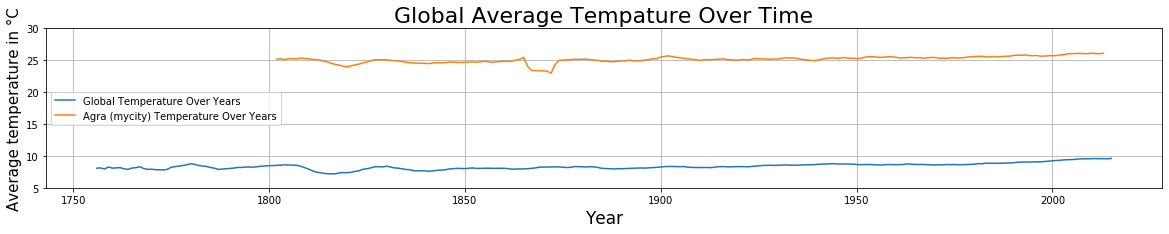

In [292]:
##plotting a graph of global and city temperature(smoothing=7 years)

fig = plt.figure(figsize=(20,17))

window_value=7

global_mov_avg = pd.DataFrame(temp_global.rolling(window = window_value).mean())
local_mov_avg = pd.DataFrame(temp_my_city.rolling(window = window_value).mean())

plt.subplot(5,1,1)
plt.grid()
plt.plot(year_global,global_mov_avg,label='Global Temperature Over Years')
plt.plot(year_my_city,local_mov_avg,label='Agra (mycity) Temperature Over Years')
plt.legend(loc=6)
plt.ylim(5,30)
plt.title('Global Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)


Text(0, 0.5, 'Average temperature in °C')

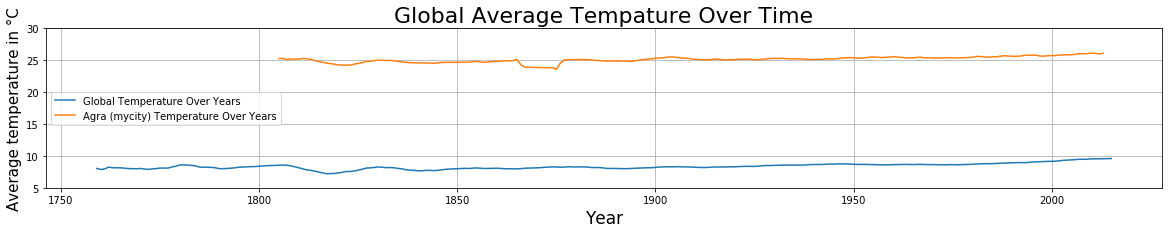

In [293]:
#plotting a graph of global and city temperature(smoothing=10 years)
fig = plt.figure(figsize=(20,17))

window_value=10

global_mov_avg = pd.DataFrame(temp_global.rolling(window = window_value).mean())
local_mov_avg = pd.DataFrame(temp_my_city.rolling(window = window_value).mean())

plt.subplot(5,1,1)
plt.grid()
plt.plot(year_global,global_mov_avg,label='Global Temperature Over Years')
plt.plot(year_my_city,local_mov_avg,label='Agra (mycity) Temperature Over Years')
plt.legend(loc=6)
plt.ylim(5,30)
plt.title('Global Average Tempature Over Time',fontsize=22)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Average temperature in °C',fontsize=15)


In [294]:
#For Global

#Finding the minimum and maximum temperatue
#Finding the minimum and maximum years
#Finding the global average temperature
min_temp_global=np.min(temp_global)
max_temp_global=np.max(temp_global)
min_year_global=min(year_global)
max_year_global=max(year_global)
avg_temp_global=np.mean(temp_global)

#For city
#Finding the minimum and maximum temperatue
#Finding the minimum and maximum years
#Finding the global average temperature
min_temp_city=np.min(temp_my_city)
max_temp_city=np.max(temp_my_city)
min_year_city=min(year_my_city)
max_year_city=max(year_my_city)
avg_temp_city=np.mean(temp_my_city)

In [295]:
#Printing the max,min,avg global temperature

print(f'The global minimum temperature from {min_year_global} to {max_year_global} is {min_temp_global}')
print(f'The global maximum temperature from {min_year_global} to {max_year_global} is {max_temp_global}')
print(f'The global average temperature from {min_year_global} to {max_year_global} is {avg_temp_global}')


The global minimum temperature from 1750 to 2015 is 5.78
The global maximum temperature from 1750 to 2015 is 9.83
The global average temperature from 1750 to 2015 is 8.36947368421053


In [296]:
#Printing the min,max,avg city(Agra)

print(f'The city minimum temperature from {min_year_city} to {max_year_city} is {min_temp_city}')
print(f'The city maximum temperature from {min_year_city} to {max_year_city} is {max_temp_city}')
print(f'The city average temperature from {min_year_city} to {max_year_city} is {avg_temp_city}')

The city minimum temperature from 1796 to 2013 is 15.61
The city maximum temperature from 1796 to 2013 is 27.27
The city average temperature from 1796 to 2013 is 25.151747572815523


In [297]:
#The average temperature difference between global and Agra(city)

print(f'The Average Temperature Difference Between Global And Agra(my_city) is {avg_temp_city-avg_temp_global}')

The Average Temperature Difference Between Global And Agra(my_city) is 16.782273888604994


# OBSERVATION

The global temperature doesn't varies much but
Agra(city) shows the frequenct changes in the temperature over years.In my opinion 1 year smoothing level is clear as it has 
visible spikes. Agra(city) temperature frequently changes over years and it continues increasing in the temperature.Global
temperature doesn't changes frequently but its temperature is gradually increasing over the years.The  observations using
1,3 smoothing steps are differentiable but 7,10 smoothing steps doesnt show enough differences.The above derived data shows
Agra temperature has increased more than the temperature increased globally.The above data shows that there is much gap between
the global and city(Agra) temperature.